# Coursera Capstone Project
### Applied Data Science Capstone

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>


Vilnius is the capital and the largest city of Lithuania. The city itself has a population of ~550 000 people. Vilnius consist of 21 elderships, a statewide administrative division, which are based on neighbourhoods. Many people around the world are facing serious health issues associated with unhealthy eating habits and a lack of exercise.  With growing health concerns, more people are joining gyms for exercise and the motivation to change their eating habits. Lately Vilnius has beed growing very fast resulting in growing demand of gyms. 


Ths final project explores the best places to open new gym throughout the city of Vilnius. Questions that will be answered in this project:
1.	Is there any location without gym?
2.	Which areas have large number of gyms?
3.	Which areas have least number of gyms?
4. What are areas with least competition? (at least one gym in that area)

## Data <a name="data"></a>

Based on definition of our problem, factor that will influence our decission is number of existing gyms in the neighborhood (or any type of fitness center)

To solve the problem, we will need the following data:
1.	Vilnius city data containg neighborhoods.
2.	Coordinates of those neighborhoods.
3.	Venue data, particulary data related to fitness industry.

### Before we get the data and start exploring it, let's import all required libraries

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
from sklearn.cluster import KMeans
import folium 
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
import haversine as hs
import math
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

As first step we will collect data about neighborhoods in Vilnius from Wikipedia

In [2]:
column_names = ['Neighborhood']
df = pd.DataFrame(columns = column_names)

In [3]:
url = "https://en.wikipedia.org/wiki/Neighborhoods_of_Vilnius"
source = requests.get(url).text

In [4]:
soup = BeautifulSoup(source, 'lxml')
table=soup.find('table', {'class':'sortable wikitable'})
links = table.find_all('a')

In [5]:
neighborhoods = []
for link in links:
    neighborhoods.append(link.get('title'))
df['Neighborhood'] = neighborhoods

In [6]:
df = df.iloc[5:]
df = df.reset_index()
del df['index']
df

,Neighborhood
0,Verkiai
1,Antakalnis
2,Pašilaičiai
3,Fabijoniškės
4,Pilaitė
5,Justiniškės
6,Viršuliškės
7,Šeškinė
8,Šnipiškės
9,Žirmūnai


Adding aditional latitude and longitude columns and filling them by getting coordinates from Geolocator

In [7]:
df.insert(1, 'Latitude', True)
df.insert(2, 'Longitude', True)

In [8]:
Latitude_list = []
Longitude_list = []
geolocator = Nominatim(user_agent="Neighborhood_explorer")
for n in range(0, df.shape[0]):
    address = df['Neighborhood'].values[n]
    print(f'Found {address} coordinates')
    location = geolocator.geocode(address)
    Latitude_list.append(location.latitude)
    Longitude_list.append(location.longitude)
print("Got all needed coordinates")

Found Verkiai coordinates
Found Antakalnis coordinates
Found Pašilaičiai coordinates
Found Fabijoniškės coordinates
Found Pilaitė coordinates
Found Justiniškės coordinates
Found Viršuliškės coordinates
Found Šeškinė coordinates
Found Šnipiškės coordinates
Found Žirmūnai coordinates
Found Karoliniškės coordinates
Found Žvėrynas coordinates
Found Grigiškės coordinates
Found Lazdynai coordinates
Found Vilkpėdė coordinates
Found Naujamiestis, Vilnius coordinates
Found Vilnius Old Town coordinates
Found Naujoji Vilnia coordinates
Found Paneriai coordinates
Found Naujininkai coordinates
Found Rasos (district) coordinates
Got all needed coordinates


In [9]:
df['Latitude'] = Latitude_list
df['Longitude'] = Longitude_list
df = df[df.Latitude != 0]

In [10]:
df

,Neighborhood,Latitude,Longitude
0,Verkiai,54.750657,25.294767
1,Antakalnis,54.705639,25.314538
2,Pašilaičiai,54.728487,25.228916
3,Fabijoniškės,54.726411,25.249242
4,Pilaitė,54.705676,25.183502
5,Justiniškės,54.717860,25.220205
6,Viršuliškės,54.705351,25.228871
7,Šeškinė,54.712653,25.252203
8,Šnipiškės,54.701755,25.278558
9,Žirmūnai,54.711172,25.298810


Let's see how those neighborhoods look on the map

In [11]:
address = 'Vilnius'
geolocator = Nominatim(user_agent="vilnius_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of VIlnius are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of VIlnius are 54.6870458, 25.2829111.


In [12]:
map_vilnius = folium.Map(location=[latitude, longitude], zoom_start=12)

In [13]:
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vilnius)  

In [14]:
map_vilnius

Ok, that we have our location candidates, let's use Foursquare API to get info on venues in each neighborhood.

We're interested in venues in 'fitness industry' and 'gym' category. So we will include in out list only venues that have 'fitness industry' and 'gym' in category name.

In [15]:
CLIENT_ID = '4SAVD3VYNQPF2H22VYRW0E3DWQGDRAXOADZDIG4HCYQIOC1X' # Foursquare ID
CLIENT_SECRET = 'TI43JF23DNM5R2YHRVRHPSIZX4O3YD4013G2TGW0HTHEI2IM' # your Foursquare Secret
VERSION = '20180604'

In [16]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=1500
    LIMIT=500
    venues_list=[]
    categoryID = '4bf58dd8d48988d175941735'
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryID={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            categoryID)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
vilnius_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )
print('Found all venues')

Verkiai
Antakalnis
Pašilaičiai
Fabijoniškės
Pilaitė
Justiniškės
Viršuliškės
Šeškinė
Šnipiškės
Žirmūnai
Karoliniškės
Žvėrynas
Grigiškės
Lazdynai
Vilkpėdė
Naujamiestis, Vilnius
Vilnius Old Town
Naujoji Vilnia
Paneriai
Naujininkai
Rasos (district)
Found all venues


In [18]:
print(vilnius_venues.shape)
vilnius_venues.head()

(987, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Verkiai,54.750657,25.294767,Verkių regioninis parkas | Verkiai Regional park,54.751579,25.293919,Park
1,Verkiai,54.750657,25.294767,Verkių dvaro rūmai,54.748114,25.292627,History Museum
2,Verkiai,54.750657,25.294767,Rupert,54.742793,25.294918,Art Gallery
3,Verkiai,54.750657,25.294767,Valakampių II-asis paplūdimys,54.742791,25.294941,Beach
4,Verkiai,54.750657,25.294767,Verkių vandens malūnas,54.745610,25.290905,Eastern European Restaurant


In [19]:
gym_venues = vilnius_venues[vilnius_venues['Venue Category'].str.contains("Gym" or "Fitness")]
gym_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,Antakalnis,54.705639,25.314538,Active Gym,54.703708,25.310606,Gym / Fitness Center
11,Antakalnis,54.705639,25.314538,G7 Sporto klubas,54.701748,25.315078,Gym / Fitness Center
15,Antakalnis,54.705639,25.314538,Brasa Crossfit,54.716610,25.304572,Gymnastics Gym
18,Antakalnis,54.705639,25.314538,Lemon Gym Antakalnis,54.703726,25.310632,Gym
84,Pašilaičiai,54.728487,25.228916,SuperGym,54.724099,25.233116,Gym / Fitness Center


As distance between neighborhoods is smaller that radius used in data collection, there definetly will be dublicates. Let's remove them.

In [20]:
distance = []
for n in range(0, gym_venues.shape[0]):
    loc1 = (gym_venues.iloc[n]['Neighborhood Latitude'], gym_venues.iloc[n]['Neighborhood Longitude'])
    loc2 = (gym_venues.iloc[n]['Venue Latitude'],gym_venues.iloc[n]['Venue Longitude'])
    dist = hs.haversine(loc1, loc2)
    distance.append(dist)
gym_venues['Distance'] = distance

<ipython-input-20-ec838185b0f1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gym_venues['Distance'] = distance


In [21]:
df_dub = pd.concat(g for _, g in gym_venues.groupby("Venue Latitude") if len(g) > 1)

In [22]:
df_dub.shape

(36, 8)

In [23]:
df_dubl_1 = df_dub.iloc[::2, :]
df_dubl_2 = df_dub.iloc[1::2, :]
dub_delete = pd.DataFrame()

In [24]:
for n in range(0, df_dubl_1.shape[0]):
    if df_dubl_1['Distance'].values[n] < df_dubl_2['Distance'].values[n]:
        row = df_dubl_2.iloc[n]
        dub_delete = dub_delete.append(row, ignore_index=True)
    elif df_dubl_2['Distance'].values[n] < df_dubl_1['Distance'].values[n]:
        row = df_dubl_1.iloc[n]
        dub_delete = dub_delete.append(row, ignore_index=True)

In [25]:
gym_venues = pd.concat([gym_venues,dub_delete]).drop_duplicates(keep=False)
gym_venues = gym_venues.dropna()

In [26]:
gym_venues = gym_venues.drop(columns=['Distance'])
gym_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
10,Antakalnis,54.705639,25.314538,Active Gym,54.703708,25.310606,Gym / Fitness Center
11,Antakalnis,54.705639,25.314538,G7 Sporto klubas,54.701748,25.315078,Gym / Fitness Center
18,Antakalnis,54.705639,25.314538,Lemon Gym Antakalnis,54.703726,25.310632,Gym
84,Pašilaičiai,54.728487,25.228916,SuperGym,54.724099,25.233116,Gym / Fitness Center
101,Pašilaičiai,54.728487,25.228916,Lemon Gym,54.741571,25.223449,Gym / Fitness Center


So now we have all the gyms in each neighborhood. 
This concludes the data gathering phase - we're now ready to use this data for analysis to produce the report.

## Methodology <a name="methodology"></a>

In first step we have collected the required data: location and type (category) of every gym in each neighborhood.

Second step in our analysis will be calculation and exploration of number of gyms across different neighborhoods.

In third and final step we will focus clusters of locations. We want locations where numbers of gyms is least. We will present map of all clusters and identify most promising neigborhoods.

## Analysis <a name="analysis"></a>

First let's count the number of gyms in every area.

In [27]:
gyms_merged = df
gyms_merged = gyms_merged.join(gym_venues.set_index('Neighborhood'), on='Neighborhood')
gyms_merged.head()

,Neighborhood,Latitude,Longitude,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Verkiai,54.750657,25.294767,NaN,NaN,NaN,NaN,NaN,NaN
1,Antakalnis,54.705639,25.314538,54.705639,25.314538,Active Gym,54.703708,25.310606,Gym / Fitness Center
1,Antakalnis,54.705639,25.314538,54.705639,25.314538,G7 Sporto klubas,54.701748,25.315078,Gym / Fitness Center
1,Antakalnis,54.705639,25.314538,54.705639,25.314538,Lemon Gym Antakalnis,54.703726,25.310632,Gym
2,Pašilaičiai,54.728487,25.228916,54.728487,25.228916,SuperGym,54.724099,25.233116,Gym / Fitness Center


In [28]:
gym_venues_gr = gyms_merged.groupby('Neighborhood').count().reset_index()

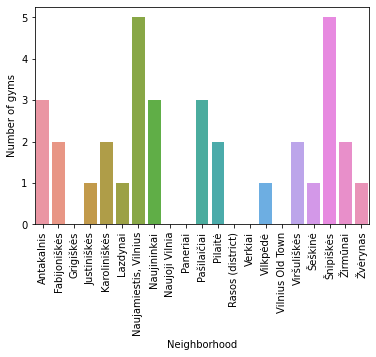

In [29]:
gyms_in_neigh = sns.barplot(x="Neighborhood", y="Venue", data=gym_venues_gr)
gyms_in_neigh.set(xlabel='Neighborhood', ylabel='Number of gyms')
for item in gyms_in_neigh.get_xticklabels():
    item.set_rotation(90)

As we can see, there are some areas where there aren't any gyms.
Area without gyms:
* Grigiškes
* Naujoji Vilnia
* Paneriai
* Rasos
* Verkiai

There are two area with most gyms:
* Naujamiestis
* Šnipiškės

Areas with least number of gyms:
* Justiniškes
* Lazdynai
* Vilkpede
* Seskine
* Zverynas

For further analysis let's drop neighborhoods without gyms

In [30]:
gyms_without_nan = gyms_merged.dropna()

Now let's cluster remaining areas and let's see what areas have least gyms

In [31]:
lat = gyms_without_nan['Venue Latitude'].to_numpy()
lng = gyms_without_nan['Venue Longitude'].to_numpy()
features = np.column_stack((lat, lng))

In [32]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [33]:
kmeans = KMeans(init="random",n_clusters=5, n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=5, random_state=42)

Let's test clustering and find out what is proper amount of clusters is needed for analysis. We will use elbow method to determine number of clusters

In [34]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42,}
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

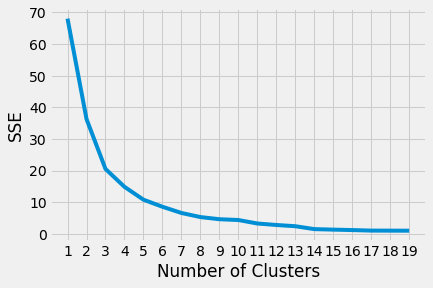

In [35]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [36]:
kl = KneeLocator(range(1, 20), sse, curve="convex", direction="decreasing")
kl.elbow

5

As result shows - we will use 5 clusters

Creating clusters

In [37]:
kmeans = KMeans(init="random",n_clusters=5, n_init=10,max_iter=300,random_state=42)
kmeans.fit(scaled_features)
kmeans.inertia_
kmeans.cluster_centers_
kmeans.n_iter_
kmeans.labels_

array([2, 2, 2, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, 2, 3,
       3, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4])

In [38]:
gyms_without_nan.insert(0, 'Cluster Labels', kmeans.labels_)

In [39]:
address = 'Vilnius'
geolocator = Nominatim(user_agent="vilnius_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

In [40]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)
kclusters = 5
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

In [41]:
markers_colors = []
for lat, lon, poi, cluster in zip(gyms_without_nan['Venue Latitude'], gyms_without_nan['Venue Longitude'],gyms_without_nan['Venue'], gyms_without_nan['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       

In [42]:
map_clusters

Let's see how those clusters look on barchart

In [43]:
gym_cluster_gr = gyms_without_nan.groupby('Cluster Labels').count().reset_index()

[Text(0.5, 0, 'Number of cluster'), Text(0, 0.5, 'Number of gyms')]

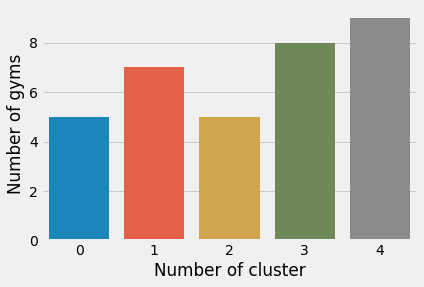

In [44]:
gym_cluster_gr_bar = sns.barplot(x="Cluster Labels", y="Venue", data=gym_cluster_gr)
gym_cluster_gr_bar.set(xlabel='Number of cluster', ylabel='Number of gyms')

As we can see cluster 0 and cluster 2 have least gyms. Let's explore them little bit more

#### Cluster 0

In [45]:
gyms_cl_0 = gyms_without_nan[gyms_without_nan['Cluster Labels'].astype('str').str.contains('0')]
gyms_cl_0 = gyms_cl_0.astype({'Cluster Labels': 'int32'})

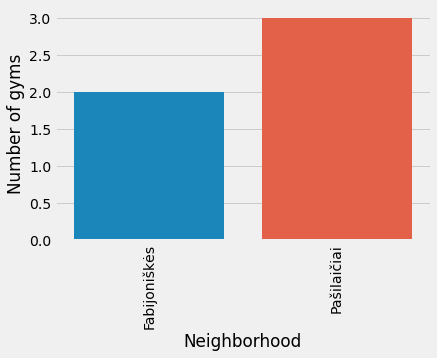

In [46]:
gyms_cl_0_grouped = gyms_cl_0.groupby('Neighborhood').count().reset_index()
gyms_cl_0_grouped_plot = sns.barplot(x="Neighborhood", y="Venue", data=gyms_cl_0_grouped)
gyms_cl_0_grouped_plot.set(xlabel='Neighborhood', ylabel='Number of gyms')
for item in gyms_cl_0_grouped_plot.get_xticklabels():
    item.set_rotation(90)

In this cluster neigborhood Fabijoniskes have least gyms, this area might be potencial for new gym.

#### Cluster 2

In [47]:
gyms_cl_2 = gyms_without_nan[gyms_without_nan['Cluster Labels'].astype('str').str.contains('2')]
gyms_cl_2 = gyms_cl_2.astype({'Cluster Labels': 'int32'})

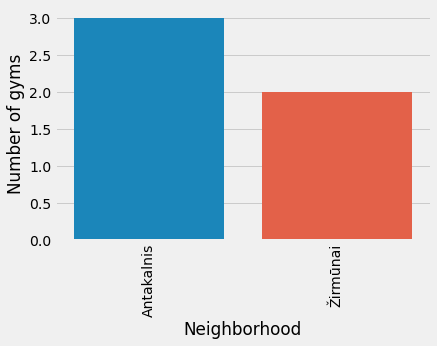

In [48]:
gyms_cl_2_grouped = gyms_cl_2.groupby('Neighborhood').count().reset_index()
gyms_cl_2_grouped_plot = sns.barplot(x="Neighborhood", y="Venue", data=gyms_cl_2_grouped)
gyms_cl_2_grouped_plot.set(xlabel='Neighborhood', ylabel='Number of gyms')
for item in gyms_cl_2_grouped_plot.get_xticklabels():
    item.set_rotation(90)

In this cluster neigborhood Zirmunai have least gyms, this area also might be potencial for new gym.

## Results and Discussion <a name="results"></a>

Our analysis shows that there is 34 gyms in Vilnius. Some areas don't have any gyms. Those areas might be interesting to open new gym, but there is always a possibility, that area due at the moment unnown reason is not suitable for fitness industy. That why for further analysis we looked at areas where already is competition. Areas with highest and least compeatition were found. In least competition areas we have found two neigbohoods which might be suitable for opening new gym.

## Conclusion <a name="conclusion"></a>

Questions that where answered in this project:
1.	There is 5 neghborhoods without any gym:
* Grigiškes
* Naujoji Vilnia
* Paneriai
* Rasos
* Verkiai
2.	There are two area with most gyms:
* Naujamiestis
* Šnipiškės
3.	Areas with least number of gyms:
* Justiniškes
* Lazdynai
* Vilkpede
* Seskine
* Zverynas
4. Areas with least competition:
* Fabijoniskes
* Zirmunai